In [3]:
import pandas as pd
import matplotlib.pyplot as mtp
import numpy as np
import seaborn as sns


In [4]:
Data=pd.read_csv("Churn_Modelling.csv")
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
Data.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


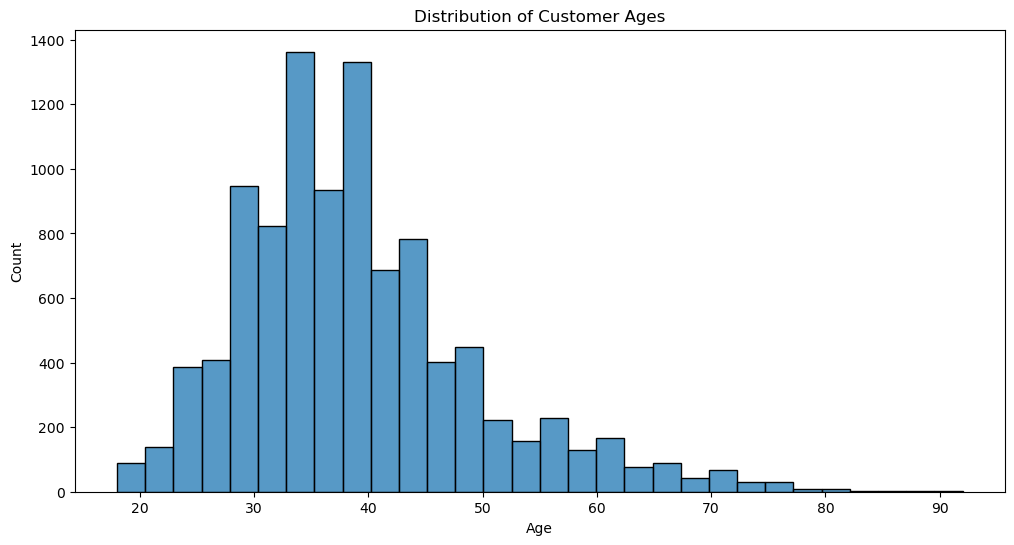

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


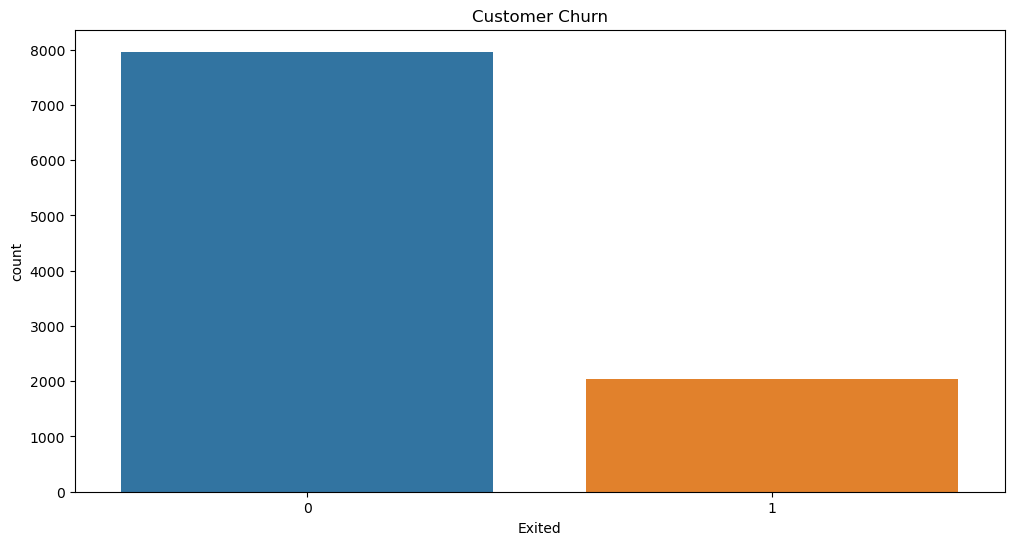

In [10]:
# Visualization
mtp.figure(figsize=(12, 6))
sns.histplot(Data['Age'], bins=30)
mtp.title("Distribution of Customer Ages")
mtp.show()

mtp.figure(figsize=(12, 6))
sns.countplot(Data['Exited'])
mtp.title("Customer Churn")
mtp.show()

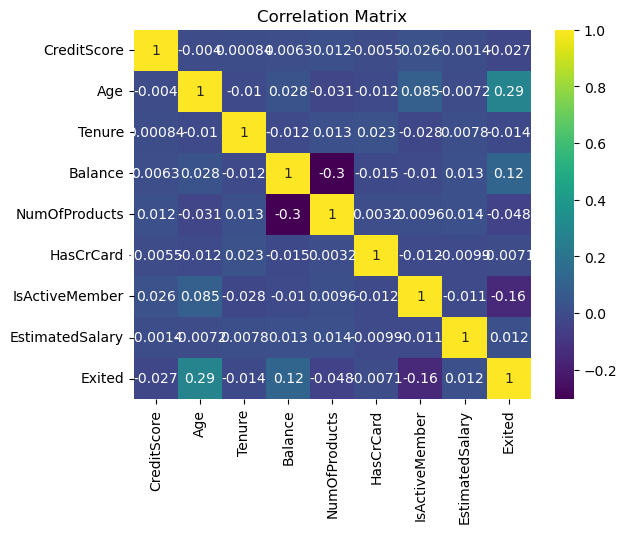

In [11]:
# Correlation matrix
correlation_matrix = Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
mtp.title("Correlation Matrix")
mtp.show()

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
Data['Geography'].unique(),    Data['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [14]:
#Label encoding 

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
Data['Geography']=encoder.fit_transform(Data['Geography'])
Data['Gender']=encoder.fit_transform(Data['Gender'])



In [15]:
Data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [16]:
Data['Geography'].unique(),    Data['Gender'].unique()

(array([0, 2, 1]), array([0, 1]))

In [17]:
# Extracting independent and dependent variable 

x=Data.drop('Exited',axis =1)
y=Data['Exited']

In [18]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state = 42)

In [21]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,673,0,1,59,0,178058.06,2,0,1,21063.71
4375,850,1,1,41,8,60880.68,1,1,0,31825.84
6698,725,0,0,31,6,0.00,1,0,0,61326.43
9805,644,0,1,33,7,174571.36,1,0,1,43943.09
1101,703,2,1,29,9,0.00,2,1,0,50679.48
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [22]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
4862,645,2,0,55,1,133676.65,1,0,1,17095.49
7025,569,2,0,51,3,0.00,3,1,0,75084.96
7647,768,0,1,25,0,78396.08,1,1,1,8316.19
7161,690,0,0,36,6,110480.48,1,0,0,81292.33


In [23]:
y_train

4901    1
4375    0
6698    0
9805    0
1101    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7500, dtype: int64

In [24]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
4862    0
7025    1
7647    0
7161    0
73      0
Name: Exited, Length: 2500, dtype: int64

In [25]:
# Feature Scalling 

from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [26]:
x_train

array([[ 0.21835119, -0.90494345,  0.91186722, ..., -1.53973586,
         0.96978946, -1.38284424],
       [ 2.05728037,  0.30121896,  0.91186722, ...,  0.64946204,
        -1.03115165, -1.19589044],
       [ 0.75860157, -0.90494345, -1.09665089, ..., -1.53973586,
        -1.03115165, -0.68342242],
       ...,
       [ 0.86249588, -0.90494345, -1.09665089, ..., -1.53973586,
        -1.03115165, -0.14675423],
       [ 0.15601461, -0.90494345,  0.91186722, ...,  0.64946204,
        -1.03115165, -0.0548954 ],
       [ 0.46769752,  0.30121896,  0.91186722, ...,  0.64946204,
         0.96978946, -0.81796934]])

In [27]:
x_test

array([[-0.58163494,  0.30121896,  0.91186722, ..., -1.53973586,
        -1.03115165, -1.02282685],
       [-0.30112032, -0.90494345,  0.91186722, ...,  0.64946204,
         0.96978946,  0.79406925],
       [-0.52968779,  1.50738137, -1.09665089, ...,  0.64946204,
        -1.03115165, -0.73145656],
       ...,
       [ 1.20534708, -0.90494345,  0.91186722, ...,  0.64946204,
         0.96978946, -1.60428715],
       [ 0.39497151, -0.90494345, -1.09665089, ..., -1.53973586,
        -1.03115165, -0.33658579],
       [-0.4985195 ,  0.30121896, -1.09665089, ...,  0.64946204,
         0.96978946, -0.73379302]])

# Fit Classification model 

In [28]:
#  Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression(random_state=0)
LRclassifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [29]:
#  Fitting Decision Tree   to the Training set

from sklearn.tree import DecisionTreeClassifier 
DTclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
DTclassifier.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# Fitting Random Forest   to the Training set

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [31]:
# Fitting Gradient Boosting  to the Training set
GBclassifier=GradientBoostingClassifier()
GBclassifier.fit(x_train,y_train)


GradientBoostingClassifier()

# Test Result Prediction 

In [32]:
# #Predicting the test set result for Logistic Regression 
y_predLR= LRclassifier.predict(x_test)

# #Predicting the test set result for Decision Tree 
y_predDT= DTclassifier.predict(x_test)

# #Predicting the test set result for Random Forest
y_predRF= LRclassifier.predict(x_test)

# #Predicting the test set result for Gradient Boosting 
y_predGB= LRclassifier.predict(x_test)



In [33]:
y_predLR,y_predDT,y_predRF,y_predGB

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

# Evaluation

In [35]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

# create Confusion matrix

cmLR=confusion_matrix(y_test,y_predLR)
cmDT=confusion_matrix(y_test,y_predDT)
cmRF=confusion_matrix(y_test,y_predRF)
cmGB=confusion_matrix(y_test,y_predGB)

In [36]:
cmLR,cmDT,cmRF,cmGB

(array([[1941,   62],
        [ 407,   90]], dtype=int64),
 array([[1730,  273],
        [ 222,  275]], dtype=int64),
 array([[1941,   62],
        [ 407,   90]], dtype=int64),
 array([[1941,   62],
        [ 407,   90]], dtype=int64))

In [37]:
# Find Accuracy Score

accuracyLR=accuracy_score(y_test,y_predLR)
accuracyDT=accuracy_score(y_test,y_predDT)
accuracyRF=accuracy_score(y_test,y_predRF)
accuracyGB=accuracy_score(y_test,y_predGB)

In [39]:
(accuracyLR*100),(accuracyDT*100),(accuracyRF*100),(accuracyGB*100)

(81.24, 80.2, 81.24, 81.24)